In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

from tqdm import tqdm
import numpy as np

import pickle

In [2]:
#!pip install datasets

In [3]:
from datasets import load_dataset

In [4]:
data = load_dataset("json", data_files="new_matching.json")

Using custom data configuration default-510b7b2ef9812173
Reusing dataset json (/home/selim/.cache/huggingface/datasets/json/default-510b7b2ef9812173/0.0.0/ac0ca5f5289a6cf108e706efcf040422dbbfa8e658dee6a819f20d76bb84d26b)
100%|██████████| 1/1 [00:00<00:00, 24.26it/s]


In [5]:
data

DatasetDict({
    train: Dataset({
        features: ['id', 'text', 'sentences', 'excerpt_sentence_indices', 'excerpts', 'raw_excerpts'],
        num_rows: 1713
    })
})

In [6]:
pd_data = pd.DataFrame(data)
pd_data['lead_id'] = pd_data.train.apply(lambda x: x['id'][0])
pd_data['project_id'] = pd_data.train.apply(lambda x: x['id'][1])
pd_data['text'] = pd_data.train.apply(lambda x: x['text'])
pd_data['sentences'] = pd_data.train.apply(lambda x: x['sentences'])
pd_data['raw_excerpts'] = pd_data.train.apply(lambda x: x['raw_excerpts'])
pd_data['excerpts'] = pd_data.train.apply(lambda x: x['excerpts'])
pd_data['excerpt_sentence_indices'] = pd_data.train.apply(lambda x: x['excerpt_sentence_indices'])
pd_data.drop(inplace=True, columns=['train'])

In [7]:
pd_data.head(2)

,lead_id,project_id,text,sentences,raw_excerpts,excerpts,excerpt_sentence_indices
0,1190,321,252 Libyan civilians killed or injured\n\n52 2...,[252 Libyan civilians killed or injured\n\n52 ...,[8 January - Tunisian border The clashes betwe...,[8 January - Tunisian border The clashes betwe...,"[{'index': 5, 'distance': 159}, {'index': 32, ..."
1,5644,321,Protection sector update on the protection sit...,[Protection sector update on the protection si...,[The fighting erupted between several armed gr...,[The fighting erupted between several armed gr...,"[{'index': 6, 'distance': 2}, {'index': 7, 'di..."


In [8]:
pd_data.shape

(1713, 7)

Text(0.5, 1.0, 'estimated time for processing using pretrained models')

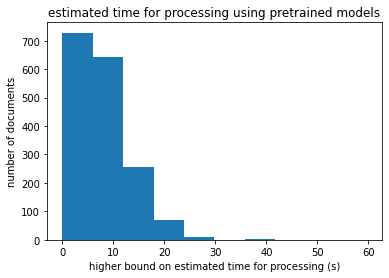

In [9]:
len_sentences = pd_data.sentences.apply(lambda x: len(x) / 3)
plt.hist(len_sentences)
plt.ylabel('number of documents')
plt.xlabel('higher bound on estimated time for processing (s)')
plt.title('estimated time for processing using pretrained models')

In [10]:
DATA_PATH = os.path.join(
    '..', '..', '..', '..', "data", "frameworks_data", 'data_v0.7.1'
)

full_data = pd.read_csv(os.path.join(DATA_PATH, 'full_dataset_with_translations.csv'))
full_excerpts = list(full_data['excerpt'])

/home/selim/anaconda3/envs/deepl/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [11]:
import spacy

# Load English tokenizer, tagger, parser and NER
nlp = spacy.load("xx_sent_ud_sm")

In [12]:
#!python -m spacy download xx_sent_ud_sm

In [13]:
n_sentences = []
for sentence in tqdm(full_excerpts):
    sent = nlp(sentence)
    i = sum([1 for _ in sent.sents])
    n_sentences.append(i)

 15%|█▌        | 24297/157948 [01:18<07:11, 309.47it/s]


KeyboardInterrupt: 

(0.0, 10.0)

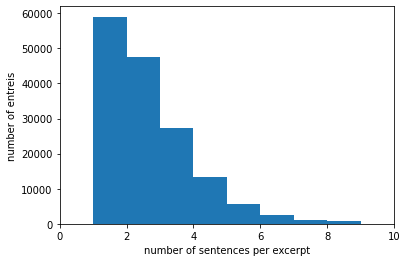

In [ ]:
plt.hist(n_sentences, bins=[i for i in range (1, 10)], histtype='barstacked')
plt.ylabel('number of entreis')
plt.xlabel('number of sentences per excerpt')
plt.xlim(0, 10)
#plt.title('estimated time for processing using pretrained models')

In [ ]:
np.median(n_sentences)

2.0

Text(0.5, 0, 'length of entry')

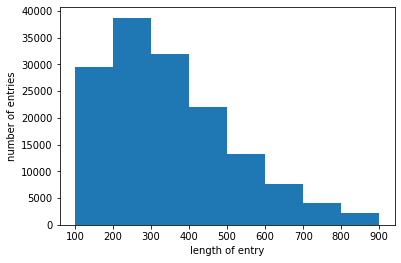

In [ ]:
lengthes_sentences = [len(sent) for sent in full_excerpts]

plt.hist(lengthes_sentences, bins=[i*100 for i in range (1, 10)], histtype='barstacked')
plt.ylabel('number of entries')
plt.xlabel('length of entry')

In [8]:
test_data = pd.read_csv(os.path.join(DATA_PATH, 'test_v0.7.1.csv'))
train_data = full_data[~full_data.entry_id.isin(test_data.entry_id)]

NameError: name 'DATA_PATH' is not defined

In [ ]:
full_data.shape, test_data.shape, train_data.shape

((157948, 27), (17200, 27), (140746, 27))

In [ ]:
#number of leads present in both the train and test set
len(set(train_data.lead_id).intersection(set(test_data.lead_id)))

4607

In [ ]:
#total number of leads
len(set(train_data.lead_id).union(set(test_data.lead_id)))

17990

In [ ]:
#number of leads only present in test set
only_test_leads = list(
    set(test_data.lead_id) - set(train_data.lead_id).intersection(set(test_data.lead_id))
)
len(only_test_leads)

569

In [ ]:
#number of leads that are only present in test set
test_pd_data = list(
    set(pd_data.lead_id).intersection(set(only_test_leads))
)
len(test_pd_data)

0

In [9]:
#proportion of clean entries
pd_data.sentences.apply(lambda x: len(x)>=5).sum() / pd_data.shape[0]

0.8814944541739638

In [10]:
endpoint_test_data = pd_data[pd_data.sentences.apply(lambda x: len(x)>=5)]
endpoint_test_data.head(2)

,lead_id,project_id,text,sentences,raw_excerpts,excerpts,excerpt_sentence_indices
0,1190,321,252 Libyan civilians killed or injured\n\n52 2...,[252 Libyan civilians killed or injured\n\n52 ...,[8 January - Tunisian border The clashes betwe...,[8 January - Tunisian border The clashes betwe...,"[{'index': 5, 'distance': 159}, {'index': 32, ..."
1,5644,321,Protection sector update on the protection sit...,[Protection sector update on the protection si...,[The fighting erupted between several armed gr...,[The fighting erupted between several armed gr...,"[{'index': 6, 'distance': 2}, {'index': 7, 'di..."


In [11]:
endpoint_test_data.iloc[0].sentences[:10]

['252 Libyan civilians killed or injured\n\n52 200 civilians civilians killed injured Caused by\n\nActs of terrorism Armed/tribal conflict\n\nremnants of war\n\nExtrajudicial execution Unlawful killing\n\n600 new families displaced (during the reporting period) Approximately 600 families, mainly in Sebha due to the ongoing tribal clashes between Awlad Sulieman and the Tebu tribes\n\nRecent developments\n\n8 January - Tunisian border The clashes between armed groups loyal to the unity government and Libyan border offi cials in the town of Ras Ajdir on the Tunisian border on 8 January resulted in the closure of the border for one day.',
 '\n\n15 January - Tripoli Violent clashes erupted in Tripoli on January 15th, as armed brigades attacked Mitiga prison inside Mitiga Airport in Suq Aljumaa area. ',
 'All schools in the area were closed for one week, the roads surrounding the fights in the Beach Road, Suq Alumaa and Bab Tajoura areas were shut down. ',
 'Heavy weapons were heard in the a

### Issues:
* If we use the models, the models will be tested on some entries they were trained on.
* Taggers select modified excerpts, but we need to use the original excerpt.
* !!! bias in data (example in libya lead) !!!:
    - some relevant entries not tagged (example first sentence)
    - change in frameworks: some tags just not present and therefore not tagged
    - parts of sentences selected, not always sentences

In [3]:
def flatten(t):
    return [item for sublist in t for item in sublist]
    
def process_raw_sentences(entry: str):
    new_sentences = [sent.split('\n\n') for sent in entry]
    flat_new_sentences = [item for sublist in new_sentences for item in sublist if len(item)>5]
    return flat_new_sentences

In [12]:

endpoint_test_data['processed_sentences'] = endpoint_test_data['sentences'].apply(process_raw_sentences)

<ipython-input-12-1249e8b616c7>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  endpoint_test_data['processed_sentences'] = endpoint_test_data['sentences'].apply(process_raw_sentences)


In [13]:
endpoint_test_data['processed_sentences']

0       [252 Libyan civilians killed or injured, 52 20...
1       [Protection sector update on the protection si...
2       [Protection sector update on the protection si...
5       [Resettlement update #44, LIBYA-NIGER situatio...
6       [DISPLACEMENT MOBILITY TRACKING EVENT TRACKER ...
                              ...                        
1708    [Govt. , of the People's Republic of Banglades...
1709    [Ce rapport est produit par OCHA RDC en collab...
1710    [SITUATION UPDATE, DRC Nyiragongo Volcano Situ...
1711    [Ce rapport est produit par OCHA RDC en collab...
1712    [Briefing note 26 May 2021, Mount Nyiragongo e...
Name: processed_sentences, Length: 1510, dtype: object

In [14]:
len(flatten(endpoint_test_data['processed_sentences']))

55659

### generate predictions for all sentences using endpoint:

In [15]:
pillars_1d_tags = [
    "Covid-19",
    "Casualties",
    "Context",
    "Displacement",
    "Humanitarian Access",
    "Shock/Event",
    "Information And Communication",
]

pillars_2d_tags = [
    "At Risk",
    "Priority Interventions",
    "Capacities & Response",
    "Humanitarian Conditions",
    "Impact",
    "Priority Needs",
]

output_columns = [
    "sectors",
    "subpillars_2d",
    "subpillars_1d",
    "gender",
    "age",
    "severity",
    "specific_needs_groups",
    "affected_groups",
]

primary_tags = ["sectors", "subpillars_2d", "subpillars_1d"]
secondary_tags = ["age", "gender", "affected_groups", "specific_needs_groups"]


def get_predictions_all(
    ratio_proba_threshold,
    output_columns=output_columns,
    pillars_2d=pillars_2d_tags,
    pillars_1d=pillars_1d_tags,
    nb_entries: int = 1,
    ratio_nb: int = 1,
):

    predictions = {column: [] for column in output_columns}
    for entry_nb in range(nb_entries):
        returns_sectors = ratio_proba_threshold["sectors"][entry_nb]

        returns_subpillars = ratio_proba_threshold["subpillars"][entry_nb]

        subpillars_2d_tags = {
            key: value
            for key, value in returns_subpillars.items()
            if key.split("->")[0] in pillars_2d
        }
        subpillars_1d_tags = {
            key: value
            for key, value in returns_subpillars.items()
            if key.split("->")[0] in pillars_1d
        }

        ratios_sectors_subpillars_2d = list(returns_sectors.values()) + list(
            subpillars_2d_tags.values()
        )

        if np.any([item >= ratio_nb for item in ratios_sectors_subpillars_2d]):
            preds_2d = get_preds_entry(subpillars_2d_tags, True, ratio_nb)
            preds_sectors = get_preds_entry(returns_sectors, True, ratio_nb)

        else:
            preds_2d = []
            preds_sectors = []

        predictions["sectors"].append(preds_sectors)
        predictions["subpillars_2d"].append(preds_2d)

        preds_1d = get_preds_entry(subpillars_1d_tags, False, ratio_nb)
        predictions["subpillars_1d"].append(preds_1d)

        returns_sec_tags = ratio_proba_threshold["secondary_tags"][entry_nb]
        preds_entry = get_preds_entry(returns_sec_tags, False, ratio_nb)

        for secondary_tag in [
            "age",
            "gender",
            "affected_groups",
            "specific_needs_groups",
        ]:
            preds_sec_tag = [
                item.split("->")[1]
                for item in preds_entry
                if item.split("->")[0] == secondary_tag
            ]
            predictions[secondary_tag].append(preds_sec_tag)

        severity_tags = {
            key: value
            for key, value in returns_sec_tags.items()
            if key.split("->")[0] == "severity"
        }
        if np.any(["Humanitarian Conditions" in item for item in preds_2d]):
            preds_severity = get_preds_entry(severity_tags, True, ratio_nb, True)
            preds_severity = [item.split("->")[1] for item in preds_severity]
        else:
            preds_severity = []
        predictions["severity"].append(preds_severity)

    return predictions


def get_preds_entry(
    preds_column, return_at_least_one=True, ratio_nb=1, return_only_one=False
):
    preds_entry = [
        sub_tag
        for sub_tag in list(preds_column.keys())
        if preds_column[sub_tag] > ratio_nb
    ]
    if return_only_one:
        preds_entry = [
            sub_tag
            for sub_tag in list(preds_column.keys())
            if preds_column[sub_tag] == max(list(preds_column.values()))
        ]
    if return_at_least_one:
        if len(preds_entry) == 0:
            preds_entry = [
                sub_tag
                for sub_tag in list(preds_column.keys())
                if preds_column[sub_tag] == max(list(preds_column.values()))
            ]
    return preds_entry

In [16]:
import boto3
import pandas as pd
from tqdm import tqdm
import os
from ast import literal_eval

# sample code for predictions with endpoint
client = boto3.session.Session().client("sagemaker-runtime", region_name="us-east-1")

In [34]:
overall_preds = []

for doc in tqdm(endpoint_test_data['processed_sentences']):
    preds_doc = []
    for sentence in doc:
        #generate predictions
        data_dict = {}
        data_dict['excerpt'] = [sentence]
        # new parameter for input
        return_type = ["all_models"]
        data_dict["return_type"] = return_type

        data = pd.DataFrame(data_dict)


        input_json = data.to_json(orient="split")

        response = client.invoke_endpoint(
            EndpointName="test-all-models",
            Body=input_json,
            ContentType="application/json; format=pandas-split",
        )
        output = response["Body"].read().decode("ascii")
        output = literal_eval(output)

        # get final output
        predictions_one_sent = get_predictions_all(output["raw_predictions"])

        preds_doc.append(predictions_one_sent)

    overall_preds.append(preds_doc)

 68%|██████▊   | 1021/1510 [2:06:49<1:00:44,  7.45s/it]


KeyboardInterrupt: 

In [35]:
len(overall_preds)

1021

In [36]:

with open("test_using_endpoint", "wb") as fp:   #Pickling
    pickle.dump(overall_preds, fp)

In [2]:
with open("test_using_endpoint", "rb") as fp:   # Unpickling
    imported_preds = pickle.load(fp)

In [4]:
len(flatten(imported_preds))

37109

In [39]:
imported_preds[0]

[{'sectors': [[]],
  'subpillars_2d': [[]],
  'subpillars_1d': [[]],
  'gender': [[]],
  'age': [[]],
  'severity': [[]],
  'specific_needs_groups': [[]],
  'affected_groups': [[]]},
 {'sectors': [['Protection']],
  'subpillars_2d': [['Humanitarian Conditions->Physical And Mental Well Being']],
  'subpillars_1d': [['Casualties->Dead', 'Casualties->Injured']],
  'gender': [[]],
  'age': [[]],
  'severity': [['Critical']],
  'specific_needs_groups': [[]],
  'affected_groups': [[]]},
 {'sectors': [[]],
  'subpillars_2d': [[]],
  'subpillars_1d': [['Context->Security & Stability']],
  'gender': [[]],
  'age': [[]],
  'severity': [[]],
  'specific_needs_groups': [[]],
  'affected_groups': [[]]},
 {'sectors': [['Protection']],
  'subpillars_2d': [['At Risk->Risk And Vulnerabilities']],
  'subpillars_1d': [['Context->Security & Stability']],
  'gender': [[]],
  'age': [[]],
  'severity': [[]],
  'specific_needs_groups': [[]],
  'affected_groups': [[]]},
 {'sectors': [[]],
  'subpillars_2d': [

1000 docs treated successfully, 8s/doc in total.

In [5]:
(60*127) / 37109

0.20534102239348945